<a href="https://colab.research.google.com/github/anissa0111/data-science-assignment/blob/main/crude_birth_rate_story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files inside ZIP: ['Metadata_Indicator_API_SP.DYN.CBRT.IN_DS2_en_csv_v2_797.csv', 'API_SP.DYN.CBRT.IN_DS2_en_csv_v2_797.csv', 'Metadata_Country_API_SP.DYN.CBRT.IN_DS2_en_csv_v2_797.csv']
Reading file: API_SP.DYN.CBRT.IN_DS2_en_csv_v2_797.csv
Raw dataset shape (rows, columns): (266, 70)
                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                         Indicator Name  Indicator Code       1960       1961  \
0  Birth rate, crude (per 1,000 people)  SP.DYN.CBRT.IN  32.043000  31.225000   
1  Birth rate, crude (per 1,000 people)  SP.DYN.CBRT.IN  47.710772  47.731227   
2  Birth rate, crude (per 1,000 people)  SP.DYN.CBRT.IN  50.516000  50.566000   
3  Birth rate, crude (per 1,000 people)  SP.DYN.CBRT.IN  47.520065  47.581875   
4  Birth rate, crude (per

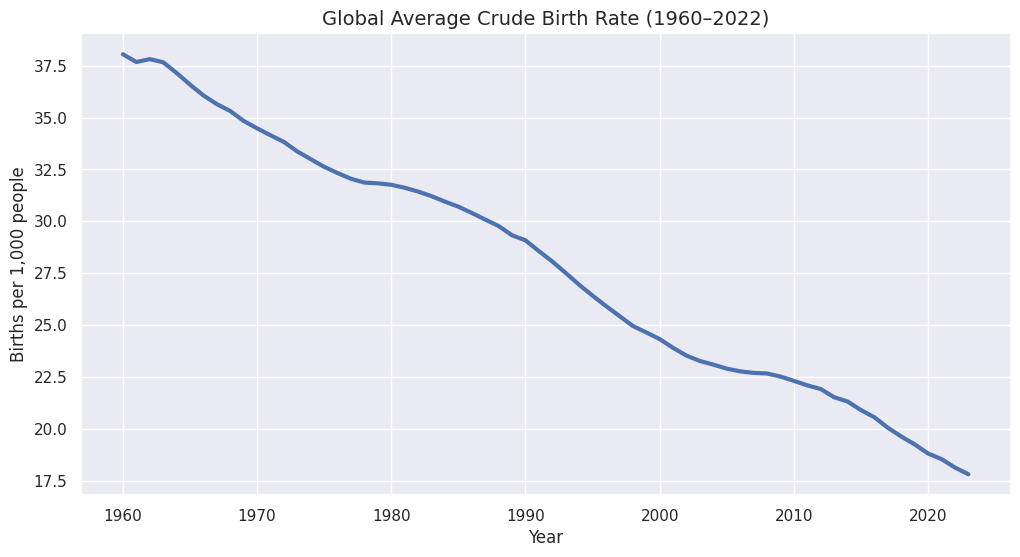


STORY INSIGHT 1:
The global crude birth rate has steadily declined since 1960,
showing a worldwide shift toward smaller family sizes.

Latest year in dataset: 2023

Top 10 Highest Birth Rate Countries:
                        Country  Crude Birth Rate
16792  Central African Republic            46.358
16971        Somalia, Fed. Rep.            42.964
16987                      Chad            42.396
16931                     Niger            41.892
16801          Congo, Dem. Rep.            41.305
16916                      Mali            40.029
16762                    Angola            37.588
16923                Mozambique            37.486
16760               Afghanistan            35.437
17004                  Tanzania            35.222

Top 10 Lowest Birth Rate Countries:
                    Country  Crude Birth Rate
16854  Hong Kong SAR, China             4.400
16884           Korea, Rep.             4.500
16904      Macao SAR, China             5.500
16970            San Marin

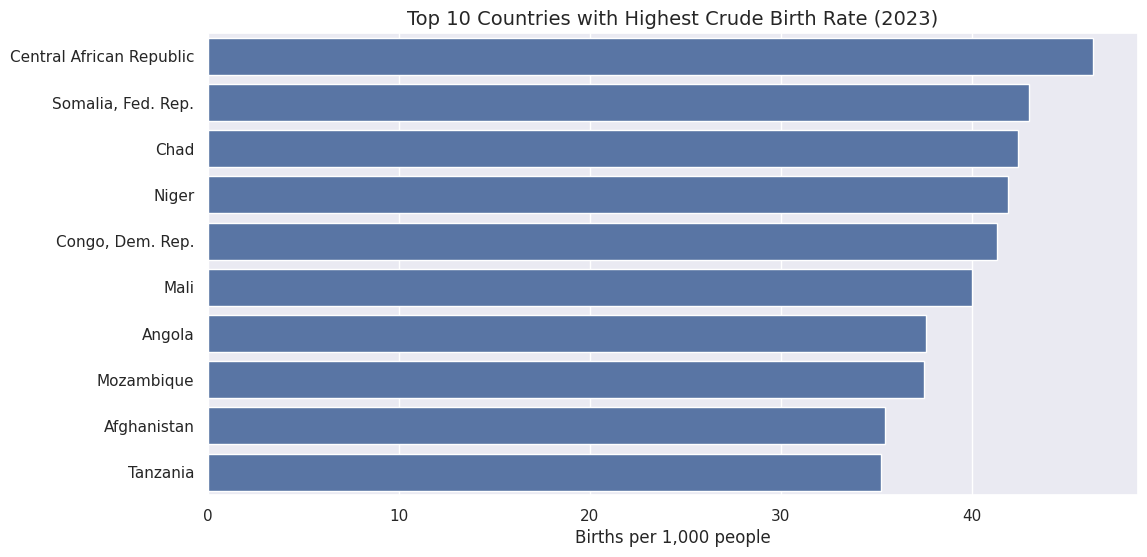

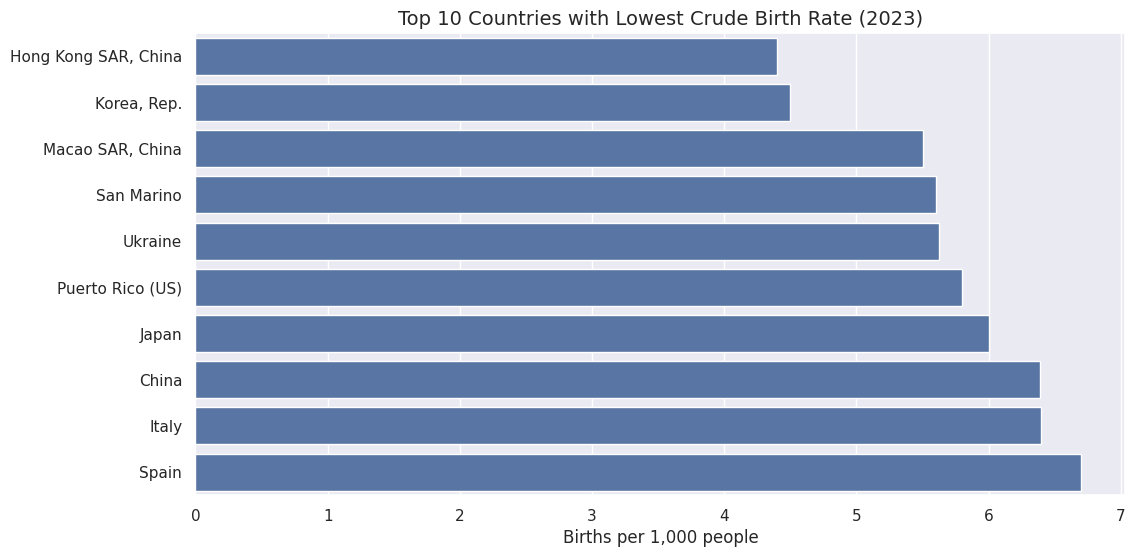

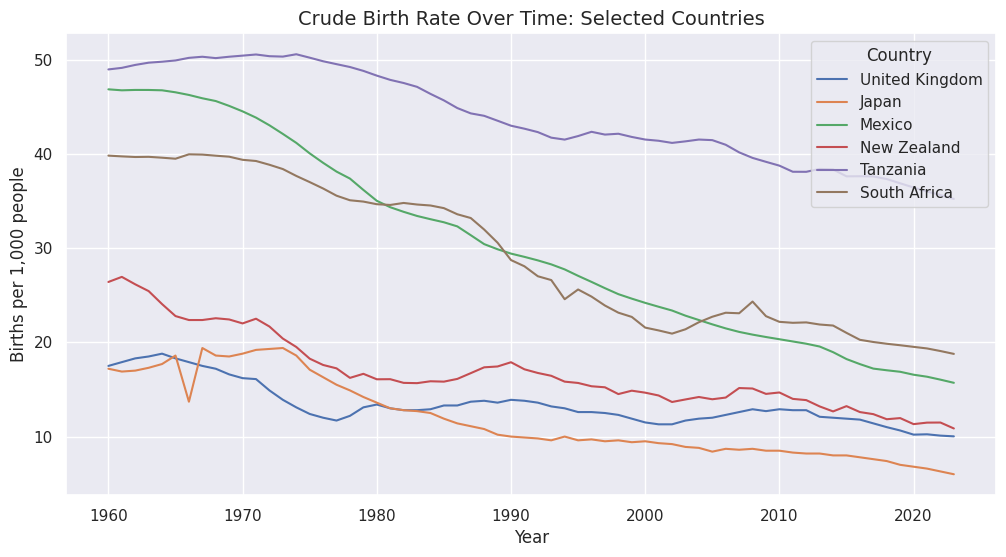


FINAL CONCLUSION:
World Bank crude birth rate data reveals one of the strongest demographic trends of the last 60 years:
a steady global decline in birth rates.
However, major differences remain between regions.
High birth rates remain concentrated in parts of Africa,
while Europe and East Asia face extremely low birth rates and ageing populations.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import requests
import io

sns.set_theme()

# ==========================================================
# Crude Birth Rate Data Story (World Bank Open Data)
# Indicator: SP.DYN.CBRT.IN
# ==========================================================

print("Downloading World Bank Crude Birth Rate dataset...")

url = "https://api.worldbank.org/v2/en/indicator/SP.DYN.CBRT.IN?downloadformat=csv"

# Download the zip file into memory
response = requests.get(url)
zip_data = zipfile.ZipFile(io.BytesIO(response.content))

# Show files inside the ZIP (optional)
print("Files inside ZIP:", zip_data.namelist())

# Select the correct main data file (starts with API_)
data_file = [f for f in zip_data.namelist() if f.startswith("API_") and f.endswith(".csv")][0]

print("Reading file:", data_file)

# Read the main data CSV from the zip
df_raw = pd.read_csv(zip_data.open(data_file), skiprows=4)

print("Raw dataset shape (rows, columns):", df_raw.shape)
print(df_raw.head())

# ==========================================================
# Clean and reshape dataset
# ==========================================================

df_raw = df_raw.drop(columns=["Indicator Name", "Indicator Code"])

df_long = df_raw.melt(
    id_vars=["Country Name", "Country Code"],
    var_name="Year",
    value_name="Crude Birth Rate"
)

df_long["Year"] = pd.to_numeric(df_long["Year"], errors="coerce")
df_long = df_long.dropna()

df_long = df_long.rename(columns={"Country Name": "Country"})

print("\nCleaned dataset shape:", df_long.shape)
print(df_long.head())

# ==========================================================
# Story Part 1: Global trend over time
# ==========================================================

global_avg = df_long.groupby("Year")["Crude Birth Rate"].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(global_avg["Year"], global_avg["Crude Birth Rate"], linewidth=3)
plt.title("Global Average Crude Birth Rate (1960–2022)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Births per 1,000 people")
plt.grid(True)
plt.show()

print("\nSTORY INSIGHT 1:")
print("The global crude birth rate has steadily declined since 1960,")
print("showing a worldwide shift toward smaller family sizes.")

# ==========================================================
# Story Part 2: Highest vs lowest birth rates (latest year)
# ==========================================================

latest_year_value = int(df_long["Year"].max())
latest_year = df_long[df_long["Year"] == latest_year_value]

top_high = latest_year.sort_values("Crude Birth Rate", ascending=False).head(10)
top_low = latest_year.sort_values("Crude Birth Rate", ascending=True).head(10)

print("\nLatest year in dataset:", latest_year_value)

print("\nTop 10 Highest Birth Rate Countries:")
print(top_high[["Country", "Crude Birth Rate"]])

print("\nTop 10 Lowest Birth Rate Countries:")
print(top_low[["Country", "Crude Birth Rate"]])

# ==========================================================
# Plot: Top 10 highest
# ==========================================================

plt.figure(figsize=(12, 6))
sns.barplot(data=top_high, x="Crude Birth Rate", y="Country")
plt.title(f"Top 10 Countries with Highest Crude Birth Rate ({latest_year_value})", fontsize=14)
plt.xlabel("Births per 1,000 people")
plt.ylabel("")
plt.show()

# ==========================================================
# Plot: Top 10 lowest
# ==========================================================

plt.figure(figsize=(12, 6))
sns.barplot(data=top_low, x="Crude Birth Rate", y="Country")
plt.title(f"Top 10 Countries with Lowest Crude Birth Rate ({latest_year_value})", fontsize=14)
plt.xlabel("Births per 1,000 people")
plt.ylabel("")
plt.show()

# ==========================================================
# Compare selected countries over time
# ==========================================================

selected_countries = ["South Africa", "United Kingdom", "New Zealand", "Mexico", "Tanzania", "Japan"]
df_selected = df_long[df_long["Country"].isin(selected_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x="Year", y="Crude Birth Rate", hue="Country")
plt.title("Crude Birth Rate Over Time: Selected Countries", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Births per 1,000 people")
plt.grid(True)
plt.show()

# ==========================================================
# Final Conclusion
# ==========================================================

print("\nFINAL CONCLUSION:")
print("World Bank crude birth rate data reveals one of the strongest demographic trends of the last 60 years:")
print("a steady global decline in birth rates.")
print("However, major differences remain between regions.")
print("High birth rates remain concentrated in parts of Africa,")
print("while Europe and East Asia face extremely low birth rates and ageing populations.")
